<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/13Day_of_ML_end-to-end_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv('/placement.csv')

*Read the file *

---




In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# Step 1 :- preprocessing


> remove the unnecessary column





In [4]:
df=df.iloc[:,1:] # 1: means we need colum 1 onwards

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0




> EDA




In [6]:
import matplotlib.pyplot as plt


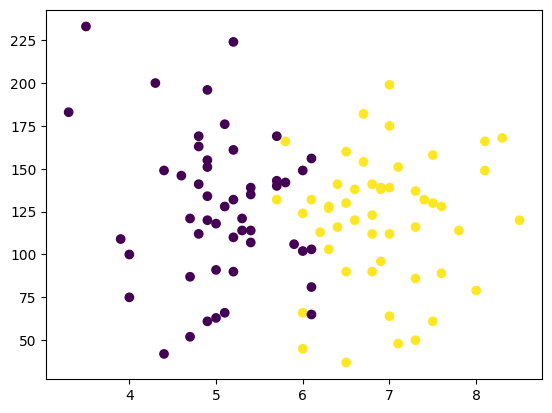

In [7]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

logistic regression use for classification bec,it is classification problem


# step 2:- extract input/output

In [8]:
X=df.iloc[:,0:2]

In [9]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [10]:
Y=df.iloc[:,-1]

In [11]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


# Step 3:- Train test split

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test =train_test_split(X,Y,test_size=0.1) # give X,Y, and test size data % here is 10% test data

In [13]:
x_train

,cgpa,iq
71,6.1,132.0
84,5.7,169.0
41,5.4,114.0
3,7.4,132.0
53,8.3,168.0
...,...,...
5,7.1,48.0
28,5.2,90.0
12,5.4,139.0
14,6.1,103.0


In [14]:
y_train

,placement
71,1
84,0
41,0
3,1
53,1
...,...
5,1
28,0
12,0
14,0


In [15]:
x_test

,cgpa,iq
57,6.5,130.0
95,4.3,200.0
4,5.8,142.0
73,4.9,61.0
39,4.6,146.0
24,4.7,121.0
67,5.0,118.0
42,7.6,89.0
59,4.8,112.0
11,6.9,138.0


In [16]:
y_test

,placement
57,1
95,0
4,0
73,0
39,0
24,0
67,0
42,1
59,0
11,1


# Step 4:- scale the values

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [18]:
x_train=sc.fit_transform(x_train) # it learn the pattern and scale the value accordingly

In [19]:
x_train


array([[ 0.04904885,  0.21509451],
       [-0.30410285,  1.1345614 ],
       [-0.56896661, -0.23221371],
       [ 1.19679184,  0.21509451],
       [ 1.99138315,  1.10971094],
       [-0.127527  , -0.43101736],
       [-0.30410285,  0.41389816],
       [ 0.04904885,  0.81150546],
       [ 0.04904885, -1.05227878],
       [-0.9221183 , -0.80377421],
       [-2.24643715,  2.72499062],
       [-0.74554246,  0.93575775],
       [-0.03923908, -1.94689521],
       [ 0.40220054, -2.14569887],
       [-1.89328545, -0.35646599],
       [ 1.72651938, -1.10197969],
       [-0.56896661,  0.28964588],
       [ 0.66706431, -0.0085596 ],
       [-1.45184584,  0.63755227],
       [-0.74554246,  2.50133651],
       [-0.83383038,  0.11569268],
       [-1.45184584, -2.02144658],
       [-2.42301299,  1.48246779],
       [ 0.22562469,  0.09084222],
       [ 0.40220054,  0.91090729],
       [ 0.75535223,  0.3890477 ],
       [ 0.13733677, -0.25706417],
       [-0.56896661, -0.40616691],
       [ 0.49048846,

In [20]:
x_test=sc.transform(x_test)  # we do not fitt bec we already learn the pattern from train data

In [21]:
x_test

array([[ 0.40220054,  0.16539359],
       [-1.54013376,  1.90492555],
       [-0.21581492,  0.46359907],
       [-1.01040623, -1.54928791],
       [-1.27527   ,  0.5630009 ],
       [-1.18698207, -0.05826051],
       [-0.9221183 , -0.13281188],
       [ 1.37336769, -0.85347512],
       [-1.09869415, -0.28191462],
       [ 0.75535223,  0.36419725]])

# Step 5:- train the model

In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
clf=LogisticRegression()

In [24]:
# we use fit function to train our model
clf.fit(x_train,y_train)

LogisticRegression()

# Step 6:- Evaluate model

In [31]:
y_perd=clf.predict(x_test)

In [32]:
y_test

,placement
57,1
95,0
4,0
73,0
39,0
24,0
67,0
42,1
59,0
11,1


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) # first give corect then give predicted

1.0



```
our model have 100% accuracy
```



**we ploat decission boundary which our model create **

In [35]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

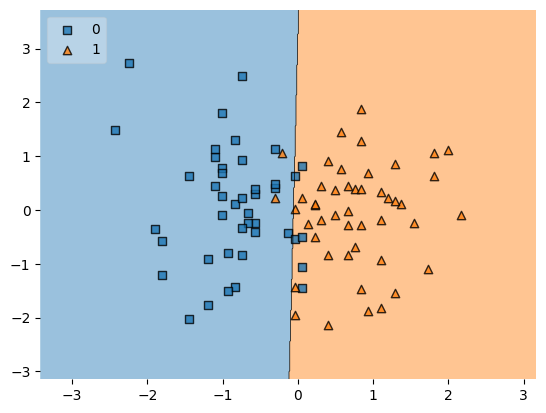

In [40]:
 plot_decision_regions(x_train, y_train.values,
                                clf=clf, legend=2)  # we convert y_train into numpy array using .values function



```
Now we pick this model using library

```



In [45]:
import pickle  # In py everyone is object so , pickl convert object into file and you can use this file in any enviroment

In [46]:
pickle.dump(clf,open('model.pkl','wb')) # wb means write binary